In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/.DS_Store
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/.DS_Store
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1947_bacteria_4876.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1946_bacteria_4875.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1952_bacteria_4883.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1954_bacteria_4886.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1951_bacteria_4882.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1946_bacteria_4874.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1949_bacteria_4880.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/.DS_Store
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/per

In [ ]:
pip install numpy==1.16.5


In [5]:
import os
import numpy as np
from PIL import Image

# Define the data directories
root_dir = '/kaggle/input/chest-xray-pneumonia/chest_xray'


Norm_tr = os.path.join(root_dir, "train", "NORMAL")
PNE_tr = os.path.join(root_dir, "train", "PNEUMONIA")
Norm_test = os.path.join(root_dir, "test", "NORMAL")
PNE_test = os.path.join(root_dir, "test", "PNEUMONIA")
Norm_val = os.path.join(root_dir, "val", "NORMAL")
PNE_val = os.path.join(root_dir, "val", "PNEUMONIA")

# Initialize the image and label arrays
train_images = []
test_images = []
val_images = []
train_labels = []
test_labels = []
val_labels = []

l = 0
# Load images from class 0 (NORMAL) and set labels to 0
for filename in os.listdir(Norm_tr):
    image_path = os.path.join(Norm_tr, filename)
    image = Image.open(image_path)
    # Convert to RGB
    image = image.convert('RGB')
    # Resize the image to a consistent size (e.g., (224, 224))
    image = image.resize((224, 224))
    image = np.array(image).reshape(-1, 224, 224, 3)  # Convert to NumPy array and reshape
    train_images.append(image)
    train_labels.append(l)

# Load images from class 0 (NORMAL) for testing and set labels to 0
for filename in os.listdir(Norm_test):
    image_path = os.path.join(Norm_test, filename)
    image = Image.open(image_path)
    # Convert to RGB
    image = image.convert('RGB')
    # Resize the image to a consistent size (e.g., (224, 224))
    image = image.resize((224, 224))
    image = np.array(image).reshape(-1, 224, 224, 3)  # Convert to NumPy array and reshape
    test_images.append(image)
    test_labels.append(l)
    
for filename in os.listdir(Norm_val):
    image_path = os.path.join(Norm_val, filename)
    image = Image.open(image_path)
    # Convert to RGB
    image = image.convert('RGB')
    # Resize the image to a consistent size (e.g., (224, 224))
    image = image.resize((224, 224))
    image = np.array(image).reshape(-1, 224, 224, 3)  # Convert to NumPy array and reshape
    val_images.append(image)
    val_labels.append(l)

l += 1
# Load images from class 1 (PNEUMONIA) and set labels to 1
for filename in os.listdir(PNE_tr):
    image_path = os.path.join(PNE_tr, filename)
    image = Image.open(image_path)
    # Convert to RGB
    image = image.convert('RGB')
    # Resize the image to a consistent size (e.g., (224, 224))
    image = image.resize((224, 224))
    image = np.array(image).reshape(-1, 224, 224, 3)  # Convert to NumPy array and reshape
    train_images.append(image)
    train_labels.append(l)

# Load images from class 1 (PNEUMONIA) for testing and set labels to 1
for filename in os.listdir(PNE_test):
    image_path = os.path.join(PNE_test, filename)
    image = Image.open(image_path)
    # Convert to RGB
    image = image.convert('RGB')
    # Resize the image to a consistent size (e.g., (224, 224))
    image = image.resize((224, 224))
    image = np.array(image).reshape(-1, 224, 224, 3)  # Convert to NumPy array and reshape
    test_images.append(image)
    test_labels.append(l)
    
for filename in os.listdir(PNE_val):
    image_path = os.path.join(PNE_val, filename)
    image = Image.open(image_path)
    # Convert to RGB
    image = image.convert('RGB')
    # Resize the image to a consistent size (e.g., (224, 224))
    image = image.resize((224, 224))
    image = np.array(image).reshape(-1, 224, 224, 3)  # Convert to NumPy array and reshape
    val_images.append(image)
    val_labels.append(l)

# Convert image and label arrays to NumPy arrays
train_images = np.concatenate(train_images, axis=0)
test_images = np.concatenate(test_images, axis=0)
val_images = np.concatenate(val_images, axis=0)
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)
val_labels = np.array(val_labels)
# Print the length of the image and label arrays
print("train_images shape",train_images.shape,train_images.dtype)
print("train_labels shape",train_labels.shape,train_labels.dtype)

print("test_images shape",test_images.shape,test_images.dtype)
print("test_labels shape",test_labels.shape,test_labels.dtype)

print("val_images shape",val_images.shape,val_images.dtype)
print("val_labels shape",val_labels.shape,val_labels.dtype)

# Normalize the pixel values 
train_images = train_images / 255.0
test_images = test_images / 255.0
val_images = val_images / 255.0


train_images shape (5216, 224, 224, 3) uint8
train_labels shape (5216,) int64
test_images shape (624, 224, 224, 3) uint8
test_labels shape (624,) int64
val_images shape (16, 224, 224, 3) uint8
val_labels shape (16,) int64


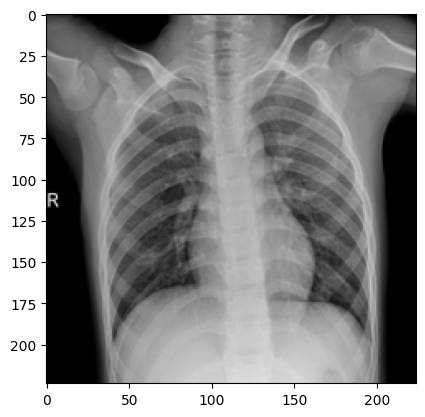

In [6]:
import matplotlib.pyplot as plt
import numpy as np
plt.imshow(train_images[50])
plt.show()

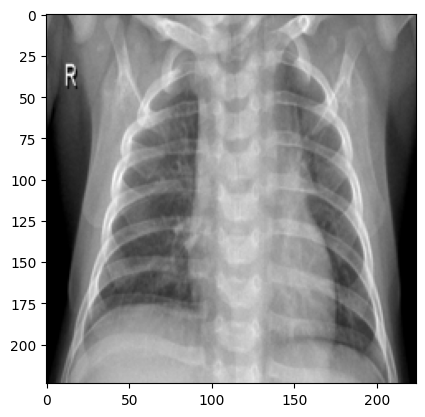

In [26]:
import matplotlib.pyplot as plt
import numpy as np
plt.imshow(test_images[207])
plt.show()

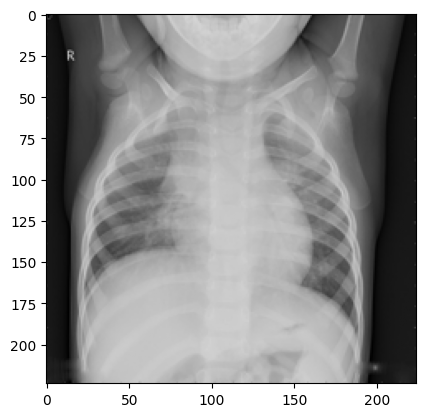

In [28]:
import matplotlib.pyplot as plt
import numpy as np
plt.imshow(val_images[7])
plt.show()

In [15]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from keras.layers import Dense,Flatten,Dropout
from keras.callbacks import EarlyStopping


base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers:
    layer.trainable = False

VGG16_model = Sequential()
VGG16_model.add(base_model)

VGG16_model.add(Flatten())
VGG16_model.add(Dense(1024, activation='relu'))
VGG16_model.add(Dropout(0.5))
VGG16_model.add(Dense(128, activation='relu'))
VGG16_model.add(Dropout(0.5))
VGG16_model.add(Dense(128, activation='relu'))
VGG16_model.add(Dropout(0.5))

# VGG16_model.add(Dense(32, activation='relu'))
# VGG16_model.add(Dropout(0.5))
VGG16_model.add(Dense(1, activation='sigmoid'))

VGG16_model.summary()

58889256/58889256 [==============================] - 2s 0us/step
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 25088)             0         
                                                                 
 dense_8 (Dense)             (None, 1024)              25691136  
                                                                 
 dropout_6 (Dropout)         (None, 1024)              0         
                                                                 
 dense_9 (Dense)             (None, 128)               131200    
                                                                 
 dropout_7 (Dropout)         (None, 128)               0         
                                                       

In [23]:
from tensorflow.keras.models import Model
import tensorflow as tf
from tensorflow.keras import backend as K
metrics = [
        'accuracy',
        tf.keras.metrics.AUC(),
        tf.keras.metrics.Recall(),
        tf.keras.metrics.Precision(),
        tf.keras.metrics.F1Score()]

early_stopping_monitor = EarlyStopping(patience = 25)
VGG16_model.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics = metrics)
VGG16_model_history=VGG16_model.fit(train_images, train_labels.astype('float32'),epochs=200,batch_size=100,validation_data=(val_images,val_labels.astype('float32')),callbacks = [early_stopping_monitor])

Epoch 1/200
53/53 [==============================] - 13s 212ms/step - loss: 0.0311 - accuracy: 0.9906 - auc_4: 0.9980 - recall_4: 0.9912 - precision_4: 0.9961 - f1_score: 0.8895 - val_loss: 0.1175 - val_accuracy: 0.9375 - val_auc_4: 1.0000 - val_recall_4: 1.0000 - val_precision_4: 0.8889 - val_f1_score: 0.6667
Epoch 2/200
53/53 [==============================] - 11s 205ms/step - loss: 0.0117 - accuracy: 0.9967 - auc_4: 0.9997 - recall_4: 0.9961 - precision_4: 0.9995 - f1_score: 0.9196 - val_loss: 0.0327 - val_accuracy: 1.0000 - val_auc_4: 1.0000 - val_recall_4: 1.0000 - val_precision_4: 1.0000 - val_f1_score: 0.6667
Epoch 3/200
53/53 [==============================] - 11s 205ms/step - loss: 0.0196 - accuracy: 0.9935 - auc_4: 0.9995 - recall_4: 0.9935 - precision_4: 0.9977 - f1_score: 0.9073 - val_loss: 1.2226 - val_accuracy: 0.8125 - val_auc_4: 0.8750 - val_recall_4: 1.0000 - val_precision_4: 0.7273 - val_f1_score: 0.6667
Epoch 4/200
53/53 [==============================] - 11s 206ms/s

In [24]:
VGG16_model.evaluate(test_images, test_labels.astype('float32'))


20/20 [==============================] - 1s 66ms/step - loss: 5.5229 - accuracy: 0.7340 - auc_4: 0.7191 - recall_4: 1.0000 - precision_4: 0.7014 - f1_score: 0.7692


[5.5228962898254395,
 0.7339743375778198,
 0.7190609574317932,
 1.0,
 0.701438844203949,
 array([0.7692308], dtype=float32)]

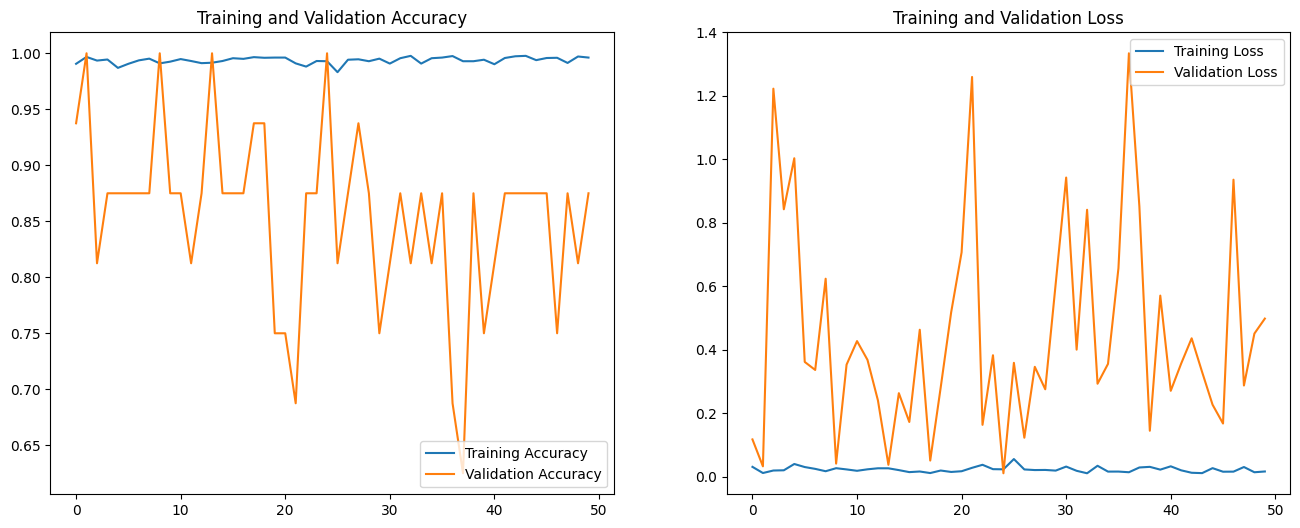

In [25]:
#Plotting the VGG16 model results

#Getting the accuracy
acc = VGG16_model_history.history['accuracy']
val_acc = VGG16_model_history.history['val_accuracy']

#Getting the losses
loss = VGG16_model_history.history['loss']
val_loss = VGG16_model_history.history['val_loss']

#No of epochs it trained
epochs_range = VGG16_model_history.epoch

#Plotting Training and Validation accuracy
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

#Plotting Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [7]:
import tensorflow as tf
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Sequential
from keras.layers import Dense,Flatten,Dropout
from keras.callbacks import EarlyStopping


base_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers:
    layer.trainable = False

VGG19_model = Sequential()
VGG19_model.add(base_model)

VGG19_model.add(Flatten())
VGG19_model.add(Dense(1024, activation='relu'))
VGG19_model.add(Dropout(0.5))
VGG19_model.add(Dense(128, activation='relu'))
VGG19_model.add(Dropout(0.5))
VGG19_model.add(Dense(128, activation='relu'))
VGG19_model.add(Dropout(0.5))

# VGG16_model.add(Dense(32, activation='relu'))
# VGG16_model.add(Dropout(0.5))
VGG19_model.add(Dense(1, activation='sigmoid'))

VGG19_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 dense_4 (Dense)             (None, 1024)              25691136  
                                                                 
 dropout_3 (Dropout)         (None, 1024)              0         
                                                                 
 dense_5 (Dense)             (None, 128)               131200    
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_6 (Dense)             (None, 128)              

In [11]:

from tensorflow.keras.models import Model
import tensorflow as tf
from tensorflow.keras import backend as K
metrics = [
        'accuracy',
        tf.keras.metrics.AUC(),
        tf.keras.metrics.Recall(),
        tf.keras.metrics.Precision(),
        tf.keras.metrics.F1Score()]

early_stopping_monitor = EarlyStopping(patience = 25)
VGG19_model.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics = metrics)
VGG19_model_history=VGG19_model.fit(train_images, train_labels.astype('float32'),epochs=200,batch_size=100,validation_data=(val_images,val_labels.astype('float32')),callbacks = [early_stopping_monitor])

Epoch 1/200
53/53 [==============================] - 22s 252ms/step - loss: 0.0676 - accuracy: 0.9739 - auc_2: 0.9963 - recall_2: 0.9755 - precision_2: 0.9893 - f1_score: 0.8595 - val_loss: 0.4503 - val_accuracy: 0.7500 - val_auc_2: 1.0000 - val_recall_2: 1.0000 - val_precision_2: 0.6667 - val_f1_score: 0.6667
Epoch 2/200
53/53 [==============================] - 13s 244ms/step - loss: 0.0665 - accuracy: 0.9749 - auc_2: 0.9950 - recall_2: 0.9757 - precision_2: 0.9903 - f1_score: 0.8576 - val_loss: 0.0759 - val_accuracy: 1.0000 - val_auc_2: 1.0000 - val_recall_2: 1.0000 - val_precision_2: 1.0000 - val_f1_score: 0.6667
Epoch 3/200
53/53 [==============================] - 13s 245ms/step - loss: 0.0581 - accuracy: 0.9789 - auc_2: 0.9967 - recall_2: 0.9778 - precision_2: 0.9937 - f1_score: 0.8575 - val_loss: 0.2609 - val_accuracy: 0.8750 - val_auc_2: 1.0000 - val_recall_2: 1.0000 - val_precision_2: 0.8000 - val_f1_score: 0.6667
Epoch 4/200
53/53 [==============================] - 13s 245ms/s

In [12]:
VGG19_model.evaluate(test_images, test_labels.astype('float32'))


20/20 [==============================] - 2s 79ms/step - loss: 5.3770 - accuracy: 0.7612 - auc_2: 0.7355 - recall_2: 1.0000 - precision_2: 0.7236 - f1_score: 0.7730


[5.377012252807617,
 0.7612179517745972,
 0.7354974746704102,
 1.0,
 0.7235621809959412,
 array([0.77304256], dtype=float32)]

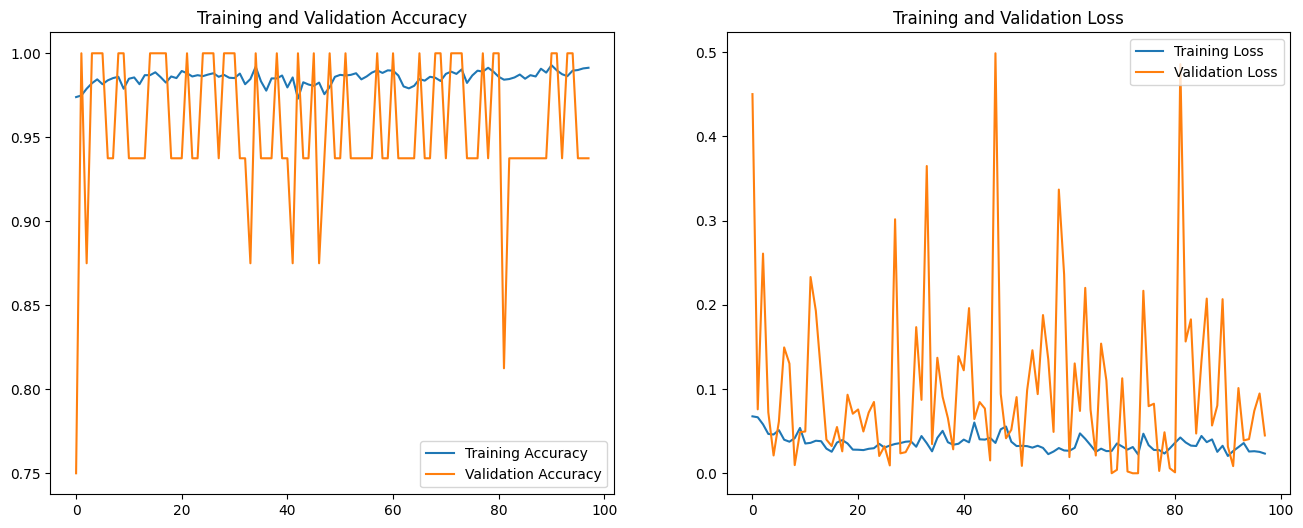

In [14]:
#Getting the accuracy
acc = VGG19_model_history.history['accuracy']
val_acc =VGG19_model_history.history['val_accuracy']

#Getting the losses
loss =VGG19_model_history.history['loss']
val_loss = VGG19_model_history.history['val_loss']

#No of epochs it trained
epochs_range = VGG19_model_history.epoch

#Plotting Training and Validation accuracy
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

#Plotting Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [9]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from keras.callbacks import EarlyStopping


# Load ResNet50 with pre-trained weights and freeze layers
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers:
    layer.trainable = False

# Create your model
resnet_model = Sequential()
resnet_model.add(base_model)

resnet_model.add(Flatten())
resnet_model.add(Dense(1024, activation='relu'))
resnet_model.add(Dropout(0.5))
resnet_model.add(Dense(128, activation='relu'))
resnet_model.add(Dropout(0.5))
resnet_model.add(Dense(128, activation='relu'))
resnet_model.add(Dropout(0.5))


# resnet_model.add(Dense(32, activation='relu'))
# resnet_model.add(Dropout(0.5))
resnet_model.add(Dense(1, activation='sigmoid'))

resnet_model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten_2 (Flatten)         (None, 100352)            0         
                                                                 
 dense_8 (Dense)             (None, 1024)              102761472 
                                                                 
 dropout_6 (Dropout)         (None, 1024)              0         
                                                                 
 dense_9 (Dense)             (None, 128)               131200    
                                                                 
 dropout_7 (Dropout)         (None, 128)               0         
                                                                 
 dense_10 (Dense)            (None, 128)              

In [10]:

from tensorflow.keras.models import Model
import tensorflow as tf
from tensorflow.keras import backend as K
metrics = [
        'accuracy',
        tf.keras.metrics.AUC(),
        tf.keras.metrics.Recall(),
        tf.keras.metrics.Precision(),
        tf.keras.metrics.F1Score()]

early_stopping_monitor = EarlyStopping(patience = 25)
resnet_model.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics = metrics)
resnet_model_history=resnet_model.fit(train_images, train_labels.astype('float32'),epochs=200,batch_size=100,validation_data=(val_images,val_labels.astype('float32')),callbacks = [early_stopping_monitor])

Epoch 1/200
53/53 [==============================] - 23s 210ms/step - loss: 2.2742 - accuracy: 0.6202 - auc_2: 0.5174 - recall_2: 0.7252 - precision_2: 0.7542 - f1_score: 0.8505 - val_loss: 0.6961 - val_accuracy: 0.5000 - val_auc_2: 0.5000 - val_recall_2: 1.0000 - val_precision_2: 0.5000 - val_f1_score: 0.6667
Epoch 2/200
53/53 [==============================] - 9s 174ms/step - loss: 0.6518 - accuracy: 0.7209 - auc_2: 0.5057 - recall_2: 0.9517 - precision_2: 0.7440 - f1_score: 0.8525 - val_loss: 0.7328 - val_accuracy: 0.5000 - val_auc_2: 0.5000 - val_recall_2: 1.0000 - val_precision_2: 0.5000 - val_f1_score: 0.6667
Epoch 3/200
53/53 [==============================] - 9s 175ms/step - loss: 0.6050 - accuracy: 0.7318 - auc_2: 0.4982 - recall_2: 0.9814 - precision_2: 0.7413 - f1_score: 0.8525 - val_loss: 0.7743 - val_accuracy: 0.5000 - val_auc_2: 0.5000 - val_recall_2: 1.0000 - val_precision_2: 0.5000 - val_f1_score: 0.6667
Epoch 4/200
53/53 [==============================] - 9s 175ms/step

In [11]:
resnet_model.evaluate(test_images, test_labels.astype('float32'))


20/20 [==============================] - 2s 60ms/step - loss: 0.6938 - accuracy: 0.6250 - auc_2: 0.5000 - recall_2: 1.0000 - precision_2: 0.6250 - f1_score: 0.7692


[0.6938226222991943, 0.625, 0.5, 1.0, 0.625, array([0.7692308], dtype=float32)]

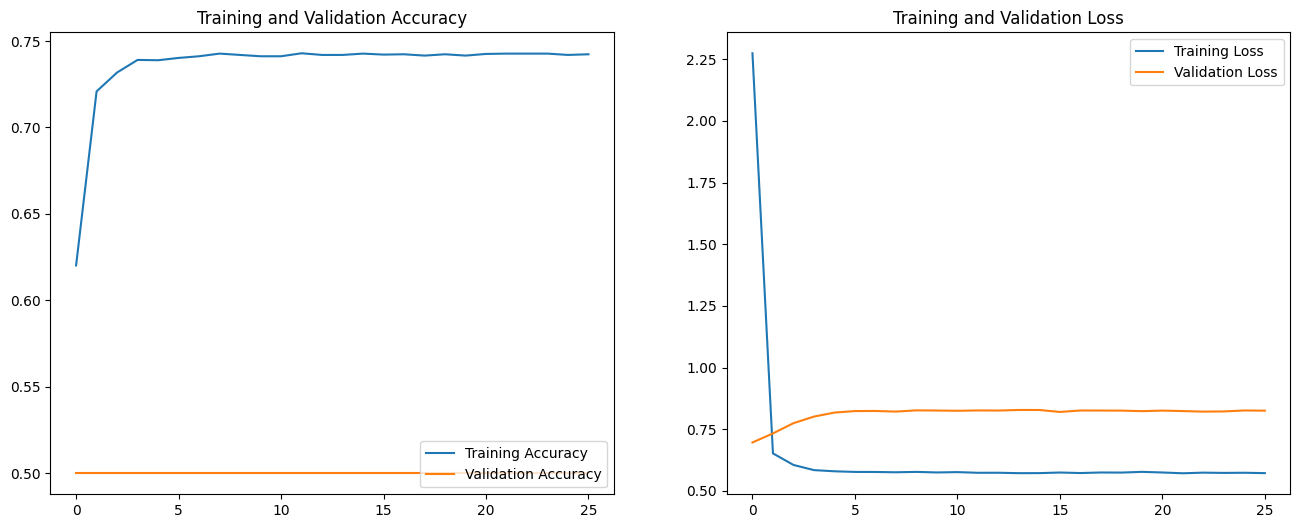

In [12]:
#Getting the accuracy
acc = resnet_model_history.history['accuracy']
val_acc =resnet_model_history.history['val_accuracy']

#Getting the losses
loss =resnet_model_history.history['loss']
val_loss = resnet_model_history.history['val_loss']

#No of epochs it trained
epochs_range = resnet_model_history.epoch

#Plotting Training and Validation accuracy
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

#Plotting Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [11]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from keras.callbacks import EarlyStopping


# Load InceptionV3 with pre-trained weights and freeze layers
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers:
    layer.trainable = False

# Create your model
inception_model = Sequential()
inception_model.add(base_model)

inception_model.add(Flatten())

inception_model.add(Dense(1024, activation='relu'))
inception_model.add(Dropout(0.5))
inception_model.add(Dense(128, activation='relu'))
inception_model.add(Dropout(0.5))
inception_model.add(Dense(128, activation='relu'))
inception_model.add(Dropout(0.5))





# inception_model.add(Dense(32, activation='relu'))
# inception_model.add(Dropout(0.5))
inception_model.add(Dense(1, activation='sigmoid'))

inception_model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 flatten (Flatten)           (None, 51200)             0         
                                                                 
 dense_4 (Dense)             (None, 1024)              52429824  
                                                                 
 dropout_3 (Dropout)         (None, 1024)              0         
                                                                 
 dense_5 (Dense)             (None, 128)               131200    
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_6 (Dense)             (None, 128)              

In [12]:

from tensorflow.keras.models import Model
import tensorflow as tf
from tensorflow.keras import backend as K
metrics = [
        'accuracy',
        tf.keras.metrics.AUC(),
        tf.keras.metrics.Recall(),
        tf.keras.metrics.Precision(),
        tf.keras.metrics.F1Score()]

early_stopping_monitor = EarlyStopping(patience = 25)
inception_model.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics = metrics)
inception_model_history=inception_model.fit(train_images, train_labels.astype('float32'),epochs=200,batch_size=100,validation_data=(val_images,val_labels.astype('float32')),callbacks = [early_stopping_monitor])

Epoch 1/200
53/53 [==============================] - 18s 179ms/step - loss: 3.1612 - accuracy: 0.7485 - auc_2: 0.7198 - recall_2: 0.8279 - precision_2: 0.8326 - f1_score: 0.8606 - val_loss: 0.5875 - val_accuracy: 0.5625 - val_auc_2: 0.6719 - val_recall_2: 1.0000 - val_precision_2: 0.5333 - val_f1_score: 0.6667
Epoch 2/200
53/53 [==============================] - 7s 129ms/step - loss: 0.6578 - accuracy: 0.7905 - auc_2: 0.7925 - recall_2: 0.9450 - precision_2: 0.8063 - f1_score: 0.8559 - val_loss: 0.4562 - val_accuracy: 0.5625 - val_auc_2: 0.8906 - val_recall_2: 1.0000 - val_precision_2: 0.5333 - val_f1_score: 0.6667
Epoch 3/200
53/53 [==============================] - 7s 129ms/step - loss: 0.4942 - accuracy: 0.7979 - auc_2: 0.8367 - recall_2: 0.9799 - precision_2: 0.7955 - f1_score: 0.8569 - val_loss: 0.4590 - val_accuracy: 0.5625 - val_auc_2: 0.8359 - val_recall_2: 1.0000 - val_precision_2: 0.5333 - val_f1_score: 0.6667
Epoch 4/200
53/53 [==============================] - 7s 128ms/step

In [13]:
inception_model.evaluate(test_images, test_labels.astype('float32'))





20/20 [==============================] - 2s 48ms/step - loss: 1.7515 - accuracy: 0.7949 - auc_2: 0.8285 - recall_2: 0.9949 - precision_2: 0.7549 - f1_score: 0.7692


[1.7515352964401245,
 0.7948718070983887,
 0.828539252281189,
 0.9948717951774597,
 0.7548637986183167,
 array([0.7692308], dtype=float32)]

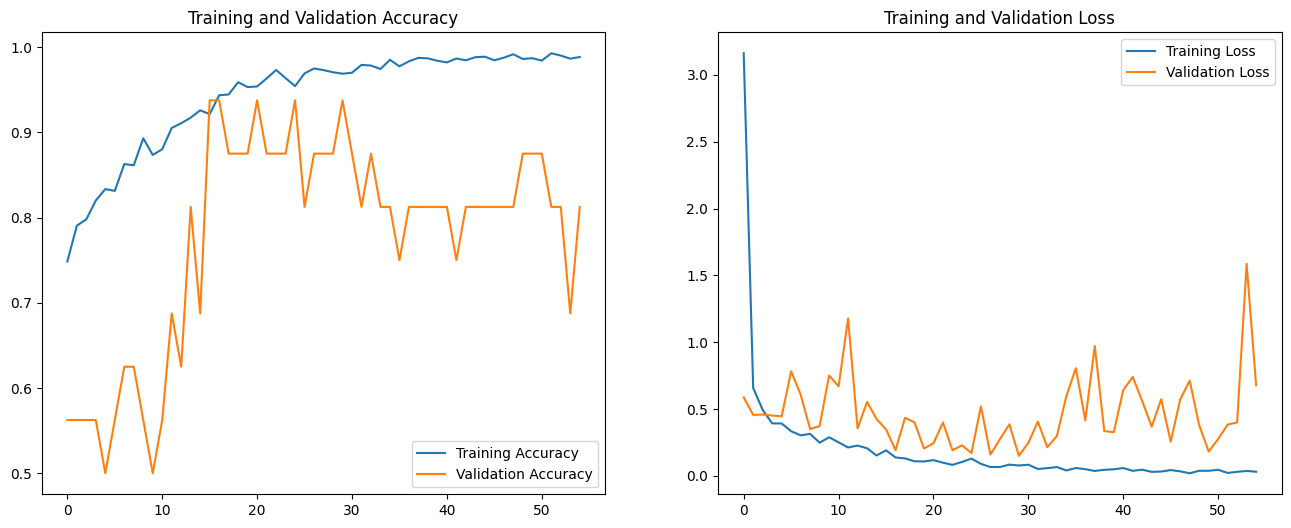

In [16]:
#Getting the accuracy
acc = inception_model_history.history['accuracy']
val_acc =inception_model_history.history['val_accuracy']

#Getting the losses
loss =inception_model_history.history['loss']
val_loss = inception_model_history.history['val_loss']

#No of epochs it trained
epochs_range = inception_model_history.epoch

#Plotting Training and Validation accuracy
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

#Plotting Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [11]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from keras.callbacks import EarlyStopping

# Load MobileNet with pre-trained weights and freeze layers
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


for layer in base_model.layers:
    layer.trainable = False

# Create your model
mobilenet_model = Sequential()
mobilenet_model.add(base_model)

mobilenet_model.add(GlobalAveragePooling2D())
mobilenet_model.add(Dense(1024, activation='relu'))
mobilenet_model.add(Dropout(0.5))
mobilenet_model.add(Dense(128, activation='relu'))
mobilenet_model.add(Dropout(0.5))
mobilenet_model.add(Dense(128, activation='relu'))
mobilenet_model.add(Dropout(0.5))

# mobilenet_model.add(Dense(32, activation='relu'))
# mobilenet_model.add(Dropout(0.5))
mobilenet_model.add(Dense(1, activation='sigmoid'))

mobilenet_model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functi  (None, 7, 7, 1024)        3228864   
 onal)                                                           
                                                                 
 global_average_pooling2d_2  (None, 1024)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_7 (Dense)             (None, 1024)              1049600   
                                                                 
 dropout_5 (Dropout)         (None, 1024)              0         
                                                                 
 dense_8 (Dense)             (None, 128)               131200    
                                                                 
 dropout_6 (Dropout)         (None, 128)              

In [12]:

from tensorflow.keras.models import Model
import tensorflow as tf
from tensorflow.keras import backend as K
metrics = [
        'accuracy',
        tf.keras.metrics.AUC(),
        tf.keras.metrics.Recall(),
        tf.keras.metrics.Precision(),
        tf.keras.metrics.F1Score()]

early_stopping_monitor = EarlyStopping(patience = 25)
mobilenet_model.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics = metrics)
mobilenet_model_history=mobilenet_model.fit(train_images, train_labels.astype('float32'),epochs=200,batch_size=100,validation_data=(val_images,val_labels.astype('float32')),callbacks = [early_stopping_monitor])

Epoch 1/200
53/53 [==============================] - 9s 99ms/step - loss: 0.3310 - accuracy: 0.8587 - auc_3: 0.9129 - recall_3: 0.9187 - precision_3: 0.8940 - f1_score: 0.8525 - val_loss: 0.2894 - val_accuracy: 0.9375 - val_auc_3: 1.0000 - val_recall_3: 1.0000 - val_precision_3: 0.8889 - val_f1_score: 0.6667
Epoch 2/200
53/53 [==============================] - 4s 83ms/step - loss: 0.1595 - accuracy: 0.9415 - auc_3: 0.9781 - recall_3: 0.9618 - precision_3: 0.9596 - f1_score: 0.8525 - val_loss: 0.2063 - val_accuracy: 0.9375 - val_auc_3: 1.0000 - val_recall_3: 1.0000 - val_precision_3: 0.8889 - val_f1_score: 0.6667
Epoch 3/200
53/53 [==============================] - 4s 82ms/step - loss: 0.1254 - accuracy: 0.9486 - auc_3: 0.9869 - recall_3: 0.9649 - precision_3: 0.9659 - f1_score: 0.8526 - val_loss: 0.2190 - val_accuracy: 0.9375 - val_auc_3: 1.0000 - val_recall_3: 1.0000 - val_precision_3: 0.8889 - val_f1_score: 0.6667
Epoch 4/200
53/53 [==============================] - 4s 82ms/step - lo

In [13]:
mobilenet_model.evaluate(test_images, test_labels.astype('float32'))



20/20 [==============================] - 1s 30ms/step - loss: 0.6193 - accuracy: 0.8734 - auc_3: 0.9298 - recall_3: 0.9949 - precision_3: 0.8344 - f1_score: 0.7692


[0.6193109154701233,
 0.8733974099159241,
 0.9298433661460876,
 0.9948717951774597,
 0.8344085812568665,
 array([0.7692308], dtype=float32)]

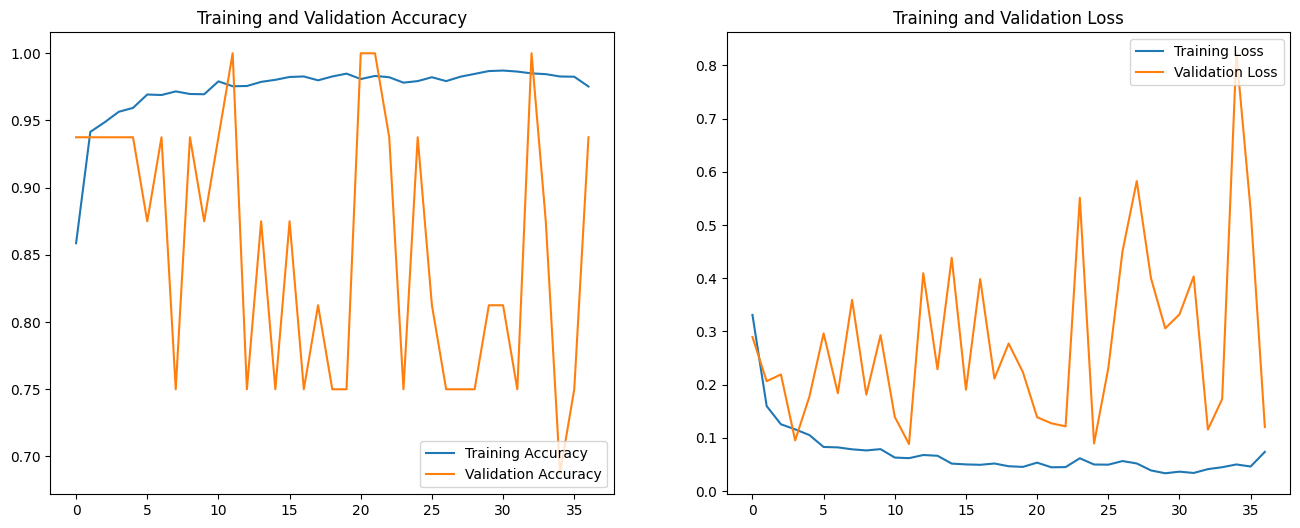

In [15]:
#Getting the accuracy
acc = mobilenet_model_history.history['accuracy']
val_acc =mobilenet_model_history.history['val_accuracy']

#Getting the losses
loss= mobilenet_model_history.history['loss']
val_loss = mobilenet_model_history.history['val_loss']

#No of epochs it trained
epochs_range = mobilenet_model_history.epoch

#Plotting Training and Validation accuracy
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

#Plotting Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()